In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
from scipy.stats import *
import sympy as smp
import scipy as sp
from scipy.integrate import quad
from pytictoc import TicToc

In [2]:
#Plot the normal distribution 

#Define the parameters
mu=0.2 #mean
sigma=0.1 #standard deviation
a=-0.4 #left truncation
b=0.8 #right truncation
nsteps=120 #number of grid steps

#Define the grid with linspace
#x=np.linspace(a,b,ngrid) #grid step
#deltax=x[1]-x[0] #grid

#Define the grid with the colon operator
deltax=(b-a)/nsteps #grid step
x=np.arange(a,b+deltax,deltax)

#Compute the PDF and the CDF
#f=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x-mu)/sigma)**2/2)
theo_pdf=norm.pdf(x,loc=mu,scale=sigma)
theo_cdf=norm.cdf(x,loc=mu,scale=sigma)

# (a)
Fa=(theo_pdf.cumsum())*deltax

# (b)
Fb=theo_pdf
Fbs=[]
for i in range(len(Fb)):
    rolling_sum=sum(Fb[0:i])*deltax
    Fbs.append(rolling_sum)
Fb=Fbs[1:]
Fb=np.insert(Fb,-1,Fb[-1])

# (c)
Fc=theo_pdf
Fcs=[]
for j in range(len(Fc)):
    rolling_sum_c=np.trapz(theo_pdf[0:j])*deltax
    Fcs.append(rolling_sum_c)
Fcs[1]=Fc[0]*deltax
Fc=Fcs[1:]
Fc=np.insert(Fc,-1,Fc[-1])

# (d)
Fd=theo_pdf
Fds=[]
for k in range(1,nsteps):
    Fd[k+1]=Fd[k-1]+(0.5*(Fd[k-1]+Fd[k]))
Fd[len(Fd[Fd>1]):]=Fb[len(Fd[Fd>1]):]

# (e)
Fe=np.cumsum(theo_pdf)-(0.5*(theo_pdf[1]+theo_pdf))
Fe[0]=theo_pdf[0]
Fe[1]=theo_pdf[1]
Fe=Fe*deltax

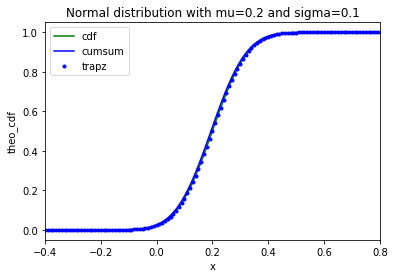

In [3]:
# (f)
theo_cdf[1:10]
Fa[1:10]
Fb[1:10]
Fc[1:10]
Fd[1:10]
Fe[1:10]

theo_cdf[int(nsteps/2)-4:int(nsteps/2)+5]
Fa[int(nsteps/2)-4:int(nsteps/2)+5]
Fb[int(nsteps/2)-4:int(nsteps/2)+5]
Fc[int(nsteps/2)-4:int(nsteps/2)+5]
Fd[int(nsteps/2)-4:int(nsteps/2)+5]
Fe[int(nsteps/2)-4:int(nsteps/2)+5]

plt.figure(1)
plt.plot(x,theo_cdf,'g',x,Fa,'b',x,Fc,'b.')
plt.xlim((a,b))
plt.xlabel('x')
plt.ylabel('theo_cdf')
plt.legend(['cdf','cumsum','trapz'])
plt.title('Normal distribution with mu={} and sigma={}'.format(mu,sigma))
plt.show()